In [12]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR

# 数据已加载并具有正确的格式
data = pd.read_csv(r'C:\Users\潘禹承\Desktop\1941 Bradford Beck Final report\merged_dataset_010.csv')
data['datatime'] = pd.to_datetime(data['datatime'])
data.set_index('datatime', inplace=True)

# 平稳性检查函数
def check_stationarity(series, critical_p=0.05):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1] < critical_p

# 应用平稳性检查
for column in data.columns:
    print(f'Checking stationarity for {column}:')
    stationary = check_stationarity(data[column])
    print(f'Stationary: {stationary}\n')

# 假设所有序列已平稳，建立VAR模型
if all(check_stationarity(data[col]) for col in data.columns):
    model = VAR(data)
    results = model.fit(maxlags=15, ic='aic')
    print(results.summary())

    # 脉冲响应分析
    irf = results.irf(10)
    irf.plot(orth=True)
    plt.show()


Checking stationarity for DO_mg/L:
ADF Statistic: -5.581820004210102
p-value: 1.3910596804058609e-06
Stationary: True

Checking stationarity for NH4_mg/L:
ADF Statistic: -6.080782160384882
p-value: 1.0935296835389475e-07
Stationary: True

Checking stationarity for PH:
ADF Statistic: -13.55737955783725
p-value: 2.345679664244834e-25
Stationary: True

Checking stationarity for TEMP_degC:
ADF Statistic: -2.6243656399084565
p-value: 0.08806522013291962
Stationary: False

Checking stationarity for Depth_mm:
ADF Statistic: -9.839786376073615
p-value: 4.7874380107738767e-17
Stationary: True

Checking stationarity for Velocity_m/s:
ADF Statistic: -6.618331605441589
p-value: 6.126479010915032e-09
Stationary: True

Checking stationarity for Flow_l/s:
ADF Statistic: -9.994101452430131
p-value: 1.96091974120042e-17
Stationary: True

Checking stationarity for Flow_mm:
ADF Statistic: -21.44768870149083
p-value: 0.0
Stationary: True

Checking stationarity for 212R0017.1:
ADF Statistic: -21.5246574702

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 13, Jul, 2024
Time:                     19:38:20
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -25.5785
Nobs:                     30905.0    HQIC:                  -25.6482
Log likelihood:           177955.    FPE:                7.02830e-12
AIC:                     -25.6811    Det(Omega_mle):     6.94252e-12
--------------------------------------------------------------------
Results for equation 212R0017.1
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  4.604375         1.496439            3.077           0.002
L1.212R0017.1          0.595643         0.005694          104.603           0.000
L1.DO_mg/L             0.032939         0.319179   

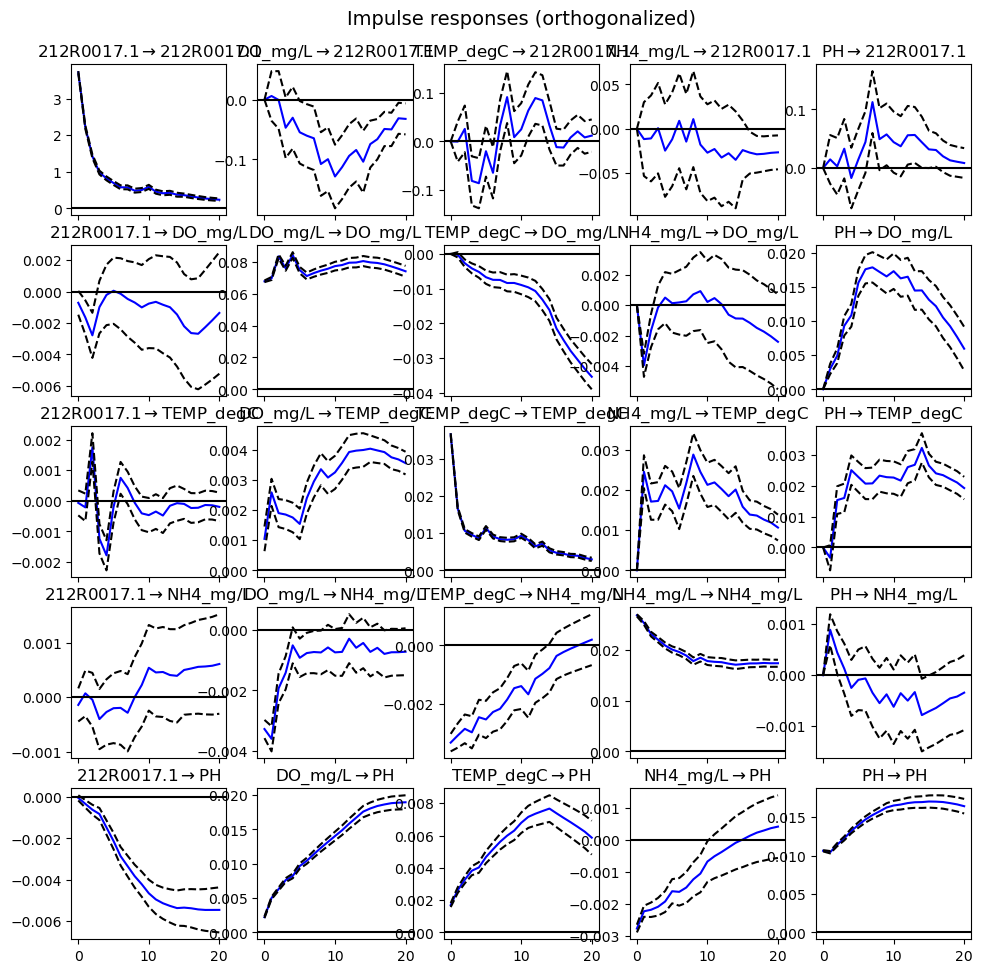

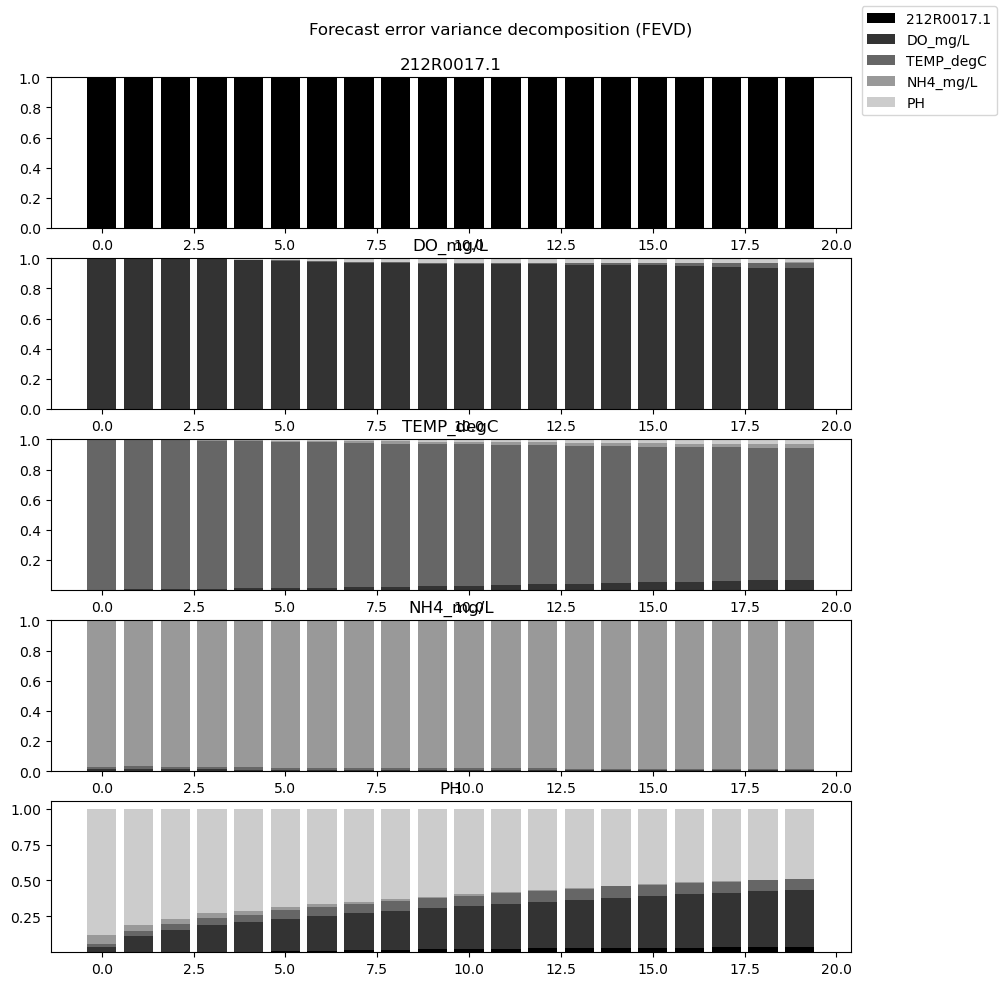

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller

# 加载数据
file_path = r'C:\Users\潘禹承\Desktop\1941 Bradford Beck Final report\merged_dataset_010.csv'
data = pd.read_csv(file_path)

# 转换日期时间格式并设置为索引
data['datatime'] = pd.to_datetime(data['datatime'])
data.set_index('datatime', inplace=True)

# 选择相关的变量
variables = ['212R0017.1', 'DO_mg/L', 'TEMP_degC', 'NH4_mg/L', 'PH']
data = data[variables]

# 检查平稳性并进行差分直到数据平稳
def ensure_stationarity(data):
    stationary_data = data.copy()
    for name, series in stationary_data.items():
        result = adfuller(series.dropna(), autolag='AIC')
        while result[1] > 0.05:  # 如果数据非平稳
            series = series.diff().dropna()  # 差分直到平稳
            result = adfuller(series, autolag='AIC')
        stationary_data[name] = series
    return stationary_data.dropna()

stationary_data = ensure_stationarity(data)

# 创建并拟合VAR模型
model = VAR(stationary_data)
results = model.fit(maxlags=15, ic='aic')
print(results.summary())

# 脉冲响应分析
irf = results.irf(20)
irf.plot(orth=True)
plt.show()

# 方差分解
fevd = results.fevd(20)
fevd.plot()
plt.show()


In [7]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv(r'C:\Users\潘禹承\Desktop\1941 Bradford Beck Final report\merged_dataset_010.csv')
data['datatime'] = pd.to_datetime(data['datatime'])
data.set_index('datatime', inplace=True)

# 平稳性检查函数
def check_stationarity(series, critical_p=0.05):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1] < critical_p

# 应用平稳性检查
for column in data.columns:
    print(f'Checking stationarity for {column}:')
    stationary = check_stationarity(data[column])
    print(f'Stationary: {stationary}\n')

# 检查所有列是否平稳，如果所有列都平稳，则建立VAR模型
if all(check_stationarity(data[col]) for col in data.columns):
    model = VAR(data)
    results = model.fit(maxlags=15, ic='aic')
    print(results.summary())

    # 脉冲响应分析
    irf = results.irf(20)  # 假设我们关注接下来20期的脉冲响应

    # 获取脉冲响应数据
    irf_data = irf.irfs
    steps = irf_data.shape[0]

    # 获取索引的日期范围
    start_date = data.index[0]
    time_index = pd.date_range(start=start_date, periods=steps, freq='H')  # 这里假设每步代表一小时

    fig, axs = plt.subplots(data.shape[1], data.shape[1], figsize=(15, 10), sharex=True)
    
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            axs[i, j].plot(time_index, irf_data[:, i, j], label=f'{data.columns[j]} -> {data.columns[i]}')
            axs[i, j].set_title(f'{data.columns[j]} -> {data.columns[i]}')
            axs[i, j].set_ylabel('Response')
            axs[i, j].legend()
    
    # 设置x轴为日期
    for ax in axs[-1, :]:
        ax.set_xlabel('Date')
        ax.set_xticks(time_index[::5])  # 每隔5个单位标一个日期
        ax.set_xticklabels([date.strftime('%Y-%m-%d %H:%M') for date in time_index[::5]], rotation=45)
    
    plt.tight_layout()
    plt.show()


Checking stationarity for DO_mg/L:
ADF Statistic: -5.581820004210102
p-value: 1.3910596804058609e-06
Stationary: True

Checking stationarity for NH4_mg/L:
ADF Statistic: -6.080782160384882
p-value: 1.0935296835389475e-07
Stationary: True

Checking stationarity for PH:
ADF Statistic: -13.55737955783725
p-value: 2.345679664244834e-25
Stationary: True

Checking stationarity for TEMP_degC:
ADF Statistic: -2.6243656399084565
p-value: 0.08806522013291962
Stationary: False

Checking stationarity for Depth_mm:
ADF Statistic: -9.839786376073615
p-value: 4.7874380107738767e-17
Stationary: True

Checking stationarity for Velocity_m/s:
ADF Statistic: -6.618331605441589
p-value: 6.126479010915032e-09
Stationary: True

Checking stationarity for Flow_l/s:
ADF Statistic: -9.994101452430131
p-value: 1.96091974120042e-17
Stationary: True

Checking stationarity for Flow_mm:
ADF Statistic: -21.44768870149083
p-value: 0.0
Stationary: True

Checking stationarity for 212R0017.1:
ADF Statistic: -21.5246574702

Augmented Dickey-Fuller Test: DO_mg/L
ADF Test Statistic                -5.547427
p-value                            0.000002
# Lags Used                       53.000000
Number of Observations Used    36328.000000
Critical Value (1%)               -3.430530
Critical Value (5%)               -2.861620
Critical Value (10%)              -2.566812

Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
Augmented Dickey-Fuller Test: NH4_mg/L
ADF Test Statistic            -6.320232e+00
p-value                        3.079026e-08
# Lags Used                    5.300000e+01
Number of Observations Used    3.632800e+04
Critical Value (1%)           -3.430530e+00
Critical Value (5%)           -2.861620e+00
Critical Value (10%)          -2.566812e+00

Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PH
ADF Test Statistic            -1.344382e+01
p-

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 13, Jul, 2024
Time:                     20:01:02
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -29.7681
Nobs:                     36366.0    HQIC:                  -29.9632
Log likelihood:           83289.9    FPE:                8.86371e-14
AIC:                     -30.0542    Det(Omega_mle):     8.57088e-14
--------------------------------------------------------------------
Results for equation DO_mg/L
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.569690         0.027370           20.814           0.000
L1.DO_mg/L               1.027709         0.005343          192.343           0.000
L1.NH4_mg/L             -0.135508         0.01

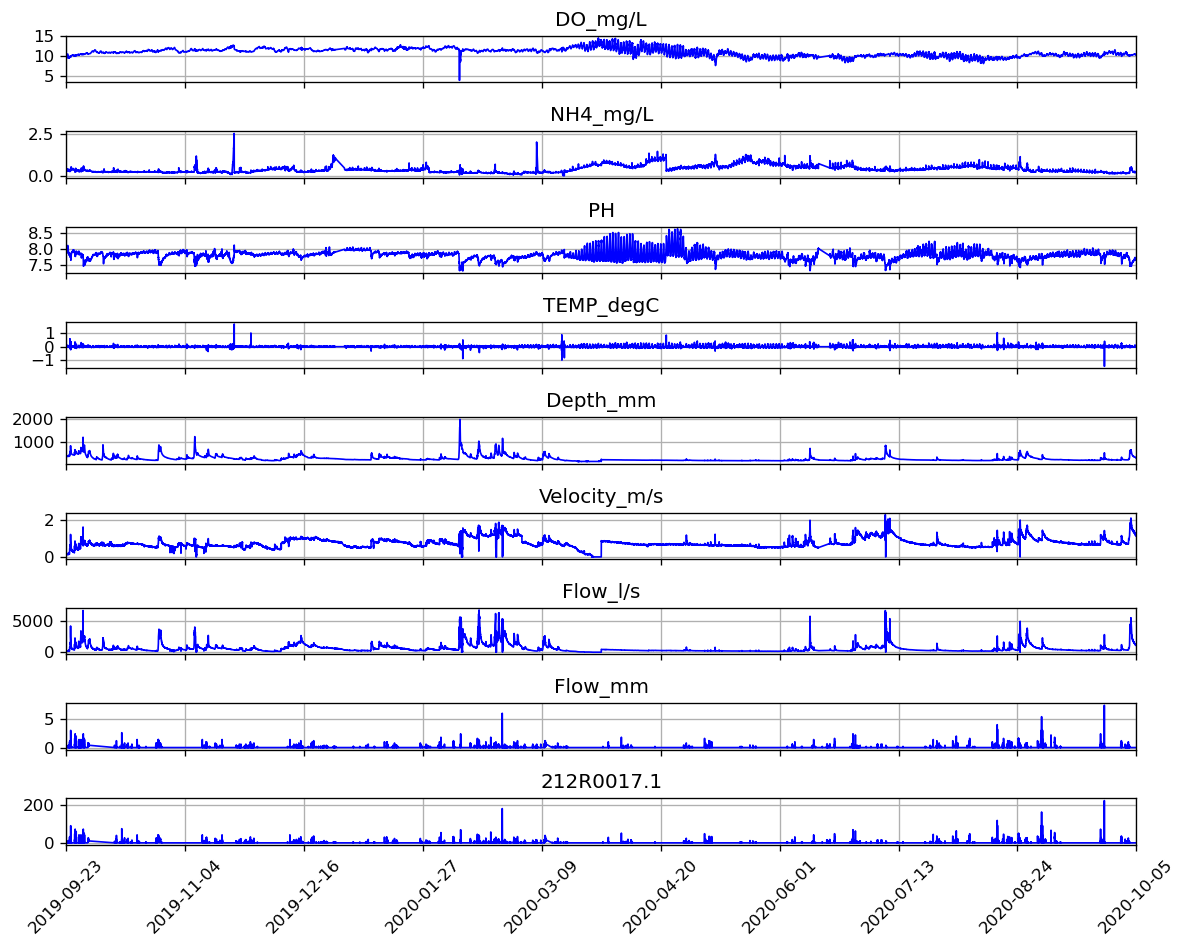

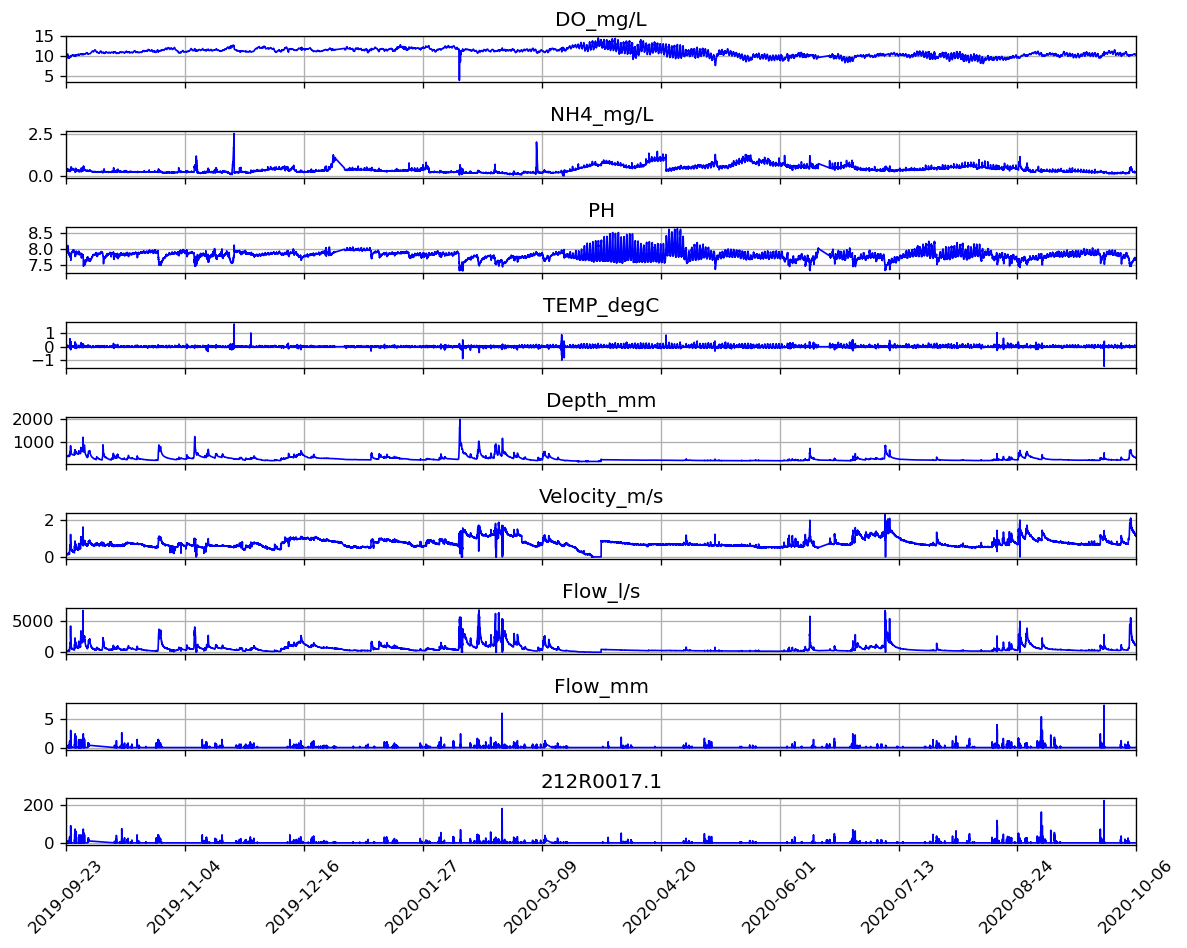

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

# Load the dataset
file_path = r'C:\Users\潘禹承\Desktop\1941 Bradford Beck Final report\merged_dataset_010.csv'
data = pd.read_csv(file_path)

# Convert 'datatime' column to datetime format
data['datatime'] = pd.to_datetime(data['datatime'], format='%Y/%m/%d %H:%M')

# Set 'datatime' as the index
data.set_index('datatime', inplace=True)

# Filter data based on the date range
data = data['2019-09-23 00:30:00':'2020-10-05 23:45:00']

# Fill missing values using linear interpolation
data_interpolated = data.interpolate(method='linear')

# Perform ADF test on each column and difference if necessary
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('')

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary")
    return result[1]

# Store differenced series if necessary
diff_data = pd.DataFrame()
for column in data_interpolated.columns:
    p_value = adf_test(data_interpolated[column], title=column)
    if p_value > 0.05:
        diff_data[column] = data_interpolated[column].diff().dropna()
    else:
        diff_data[column] = data_interpolated[column]

# VAR model
model = VAR(diff_data.dropna())
results = model.fit(maxlags=15, ic='aic')

# Display the results
print(results.summary())

# Plot the results
fig, axes = plt.subplots(nrows=len(diff_data.columns), ncols=1, figsize=(10, 8), dpi=120, sharex=True)
for i, (col, ax) in enumerate(zip(diff_data.columns, axes.flatten())):
    ax.plot(diff_data.index, diff_data[col], color='blue', linewidth=1)
    ax.set_title(col)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.grid(True)
    # Set x-axis range and labels
    ax.set_xlim([diff_data.index.min(), diff_data.index.max()])
    ax.set_xticks(pd.date_range(start=diff_data.index.min(), end=diff_data.index.max(), periods=10))
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

# Forecasting
forecast_input = diff_data.values[-results.k_ar:]
fc = results.forecast(y=forecast_input, steps=10)
df_forecast = pd.DataFrame(fc, index=pd.date_range(start=diff_data.index[-1], periods=10, freq='15T'), columns=diff_data.columns)

# Plot forecast
fig, axes = plt.subplots(nrows=len(diff_data.columns), ncols=1, figsize=(10, 8), dpi=120, sharex=True)
for i, (col, ax) in enumerate(zip(diff_data.columns, axes.flatten())):
    ax.plot(diff_data.index, diff_data[col], color='blue', linewidth=1)
    ax.plot(df_forecast.index, df_forecast[col], color='red', linestyle='dashed', linewidth=1)
    ax.set_title(col)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.grid(True)
    ax.set_xlim([diff_data.index.min(), df_forecast.index.max()])
    ax.set_xticks(pd.date_range(start=diff_data.index.min(), end=df_forecast.index.max(), periods=10))
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()


ADF Test for 212R0017.1: p-value = 0.0
ADF Test for DO_mg/L: p-value = 1.6487383286508242e-06
ADF Test for TEMP_degC: p-value = 0.10034680119309186
ADF Test for NH4_mg/L: p-value = 3.079026072312004e-08
ADF Test for PH: p-value = 3.7992262480033246e-25


D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 13, Jul, 2024
Time:                     20:03:31
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -26.2316
Nobs:                     36366.0    HQIC:                  -26.2922
Log likelihood:           220959.    FPE:                3.70830e-12
AIC:                     -26.3204    Det(Omega_mle):     3.66980e-12
--------------------------------------------------------------------
Results for equation 212R0017.1
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  3.196703         1.223467            2.613           0.009
L1.212R0017.1          0.628509         0.005247          119.788           0.000
L1.DO_mg/L             0.188846         0.286839   

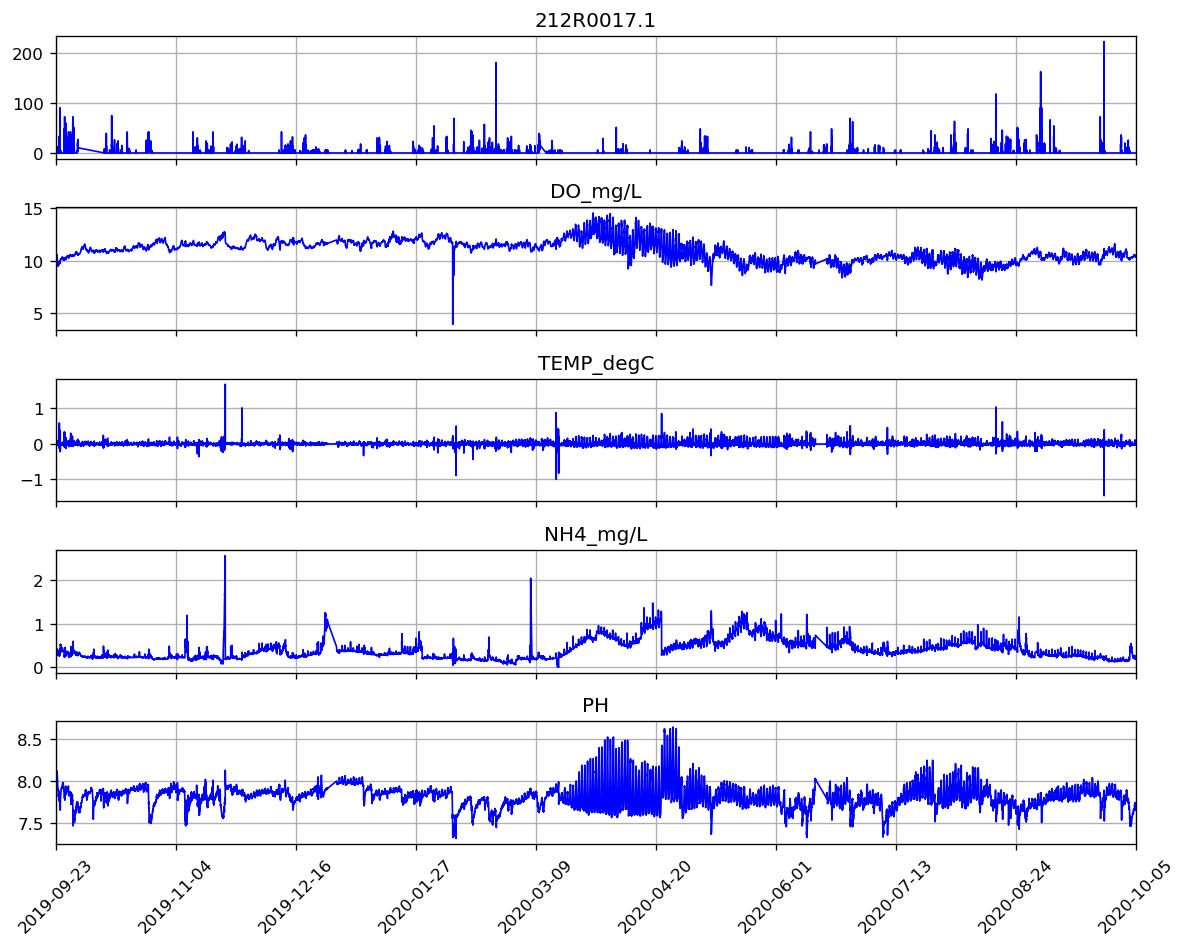

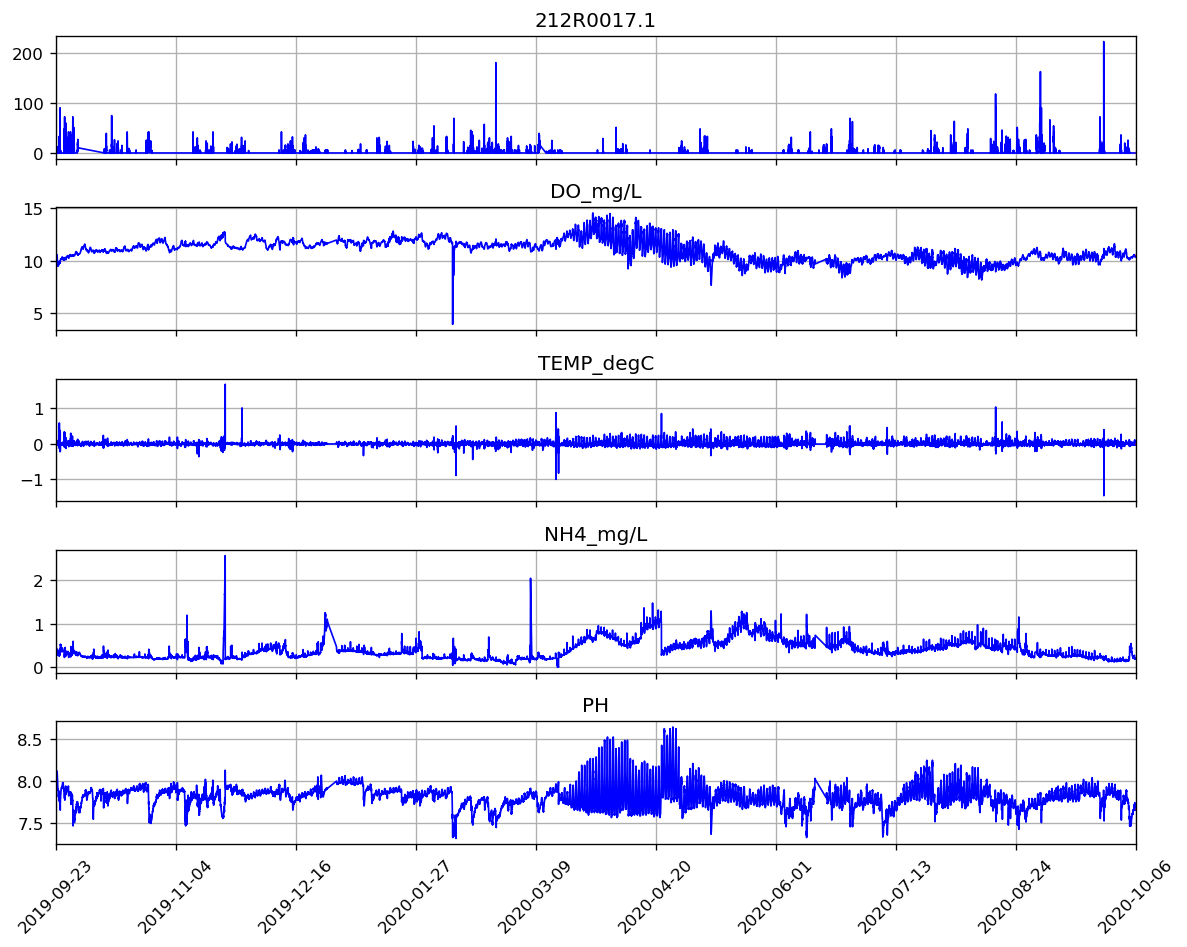

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

# 加载数据集
file_path = r'C:\Users\潘禹承\Desktop\1941 Bradford Beck Final report\merged_dataset_010.csv'
data = pd.read_csv(file_path)

# 将 'datatime' 列转换为 datetime 格式
data['datatime'] = pd.to_datetime(data['datatime'], format='%Y/%m/%d %H:%M')

# 将 'datatime' 设为索引
data.set_index('datatime', inplace=True)

# 根据时间范围过滤数据
data = data['2019-09-23 00:30:00':'2020-10-05 23:45:00']

# 填补缺失值
data_interpolated = data.interpolate(method='linear')

# 选择相关列进行分析
selected_columns = ['212R0017.1', 'DO_mg/L', 'TEMP_degC', 'NH4_mg/L', 'PH']
data_selected = data_interpolated[selected_columns]

# ADF 检验并在必要时进行差分处理
def adf_test(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Test for {title}: p-value = {result[1]}')
    return result[1]

# 存储差分处理后的数据
diff_data = pd.DataFrame()
for column in data_selected.columns:
    p_value = adf_test(data_selected[column], title=column)
    if p_value > 0.05:
        diff_data[column] = data_selected[column].diff().dropna()
    else:
        diff_data[column] = data_selected[column]

# 拟合 VAR 模型
model = VAR(diff_data.dropna())
results = model.fit(maxlags=15, ic='aic')

# 打印模型结果摘要
print(results.summary())

# 绘制 VAR 模型的拟合结果
fig, axes = plt.subplots(nrows=len(diff_data.columns), ncols=1, figsize=(10, 8), dpi=120, sharex=True)
for i, (col, ax) in enumerate(zip(diff_data.columns, axes.flatten())):
    ax.plot(diff_data.index, diff_data[col], color='blue', linewidth=1)
    ax.set_title(col)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.grid(True)
    # 设置 x 轴范围和标签
    ax.set_xlim([diff_data.index.min(), diff_data.index.max()])
    ax.set_xticks(pd.date_range(start=diff_data.index.min(), end=diff_data.index.max(), periods=10))
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

# 预测未来值
forecast_input = diff_data.values[-results.k_ar:]
fc = results.forecast(y=forecast_input, steps=10)
df_forecast = pd.DataFrame(fc, index=pd.date_range(start=diff_data.index[-1], periods=10, freq='15T'), columns=diff_data.columns)

# 绘制预测结果
fig, axes = plt.subplots(nrows=len(diff_data.columns), ncols=1, figsize=(10, 8), dpi=120, sharex=True)
for i, (col, ax) in enumerate(zip(diff_data.columns, axes.flatten())):
    ax.plot(diff_data.index, diff_data[col], color='blue', linewidth=1)
    ax.plot(df_forecast.index, df_forecast[col], color='red', linestyle='dashed', linewidth=1)
    ax.set_title(col)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.grid(True)
    ax.set_xlim([diff_data.index.min(), df_forecast.index.max()])
    ax.set_xticks(pd.date_range(start=diff_data.index.min(), end=df_forecast.index.max(), periods=10))
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()


Pearson Correlation Matrix:
             Flow_mm   DO_mg/L  TEMP_degC  NH4_mg/L        PH
Flow_mm    1.000000 -0.047505  -0.012172 -0.073667 -0.139276
DO_mg/L   -0.047505  1.000000  -0.841654 -0.219327  0.317042
TEMP_degC -0.012172 -0.841654   1.000000  0.332539 -0.010030
NH4_mg/L  -0.073667 -0.219327   0.332539  1.000000  0.004696
PH        -0.139276  0.317042  -0.010030  0.004696  1.000000
Spearman Correlation Matrix:
             Flow_mm   DO_mg/L  TEMP_degC  NH4_mg/L        PH
Flow_mm    1.000000 -0.057743  -0.021672 -0.103452 -0.146000
DO_mg/L   -0.057743  1.000000  -0.848741 -0.296031  0.261948
TEMP_degC -0.021672 -0.848741   1.000000  0.441545 -0.040220
NH4_mg/L  -0.103452 -0.296031   0.441545  1.000000 -0.022480
PH        -0.146000  0.261948  -0.040220 -0.022480  1.000000
ADF Test for Flow_mm: p-value = 0.0
ADF Test for DO_mg/L: p-value = 1.7229079980408436e-06
ADF Test for TEMP_degC: p-value = 0.10117207124908323
ADF Test for NH4_mg/L: p-value = 2.8469748899454412e-08
ADF Test

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 13, Jul, 2024
Time:                     22:16:10
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -32.7682
Nobs:                     36273.0    HQIC:                  -32.8289
Log likelihood:           338949.    FPE:                5.37382e-15
AIC:                     -32.8572    Det(Omega_mle):     5.31788e-15
--------------------------------------------------------------------
Results for equation Flow_mm
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.197217         0.048822            4.039           0.000
L1.Flow_mm            0.564403         0.005255          107.395           0.000
L1.DO_mg/L           -0.055850         0.011155           

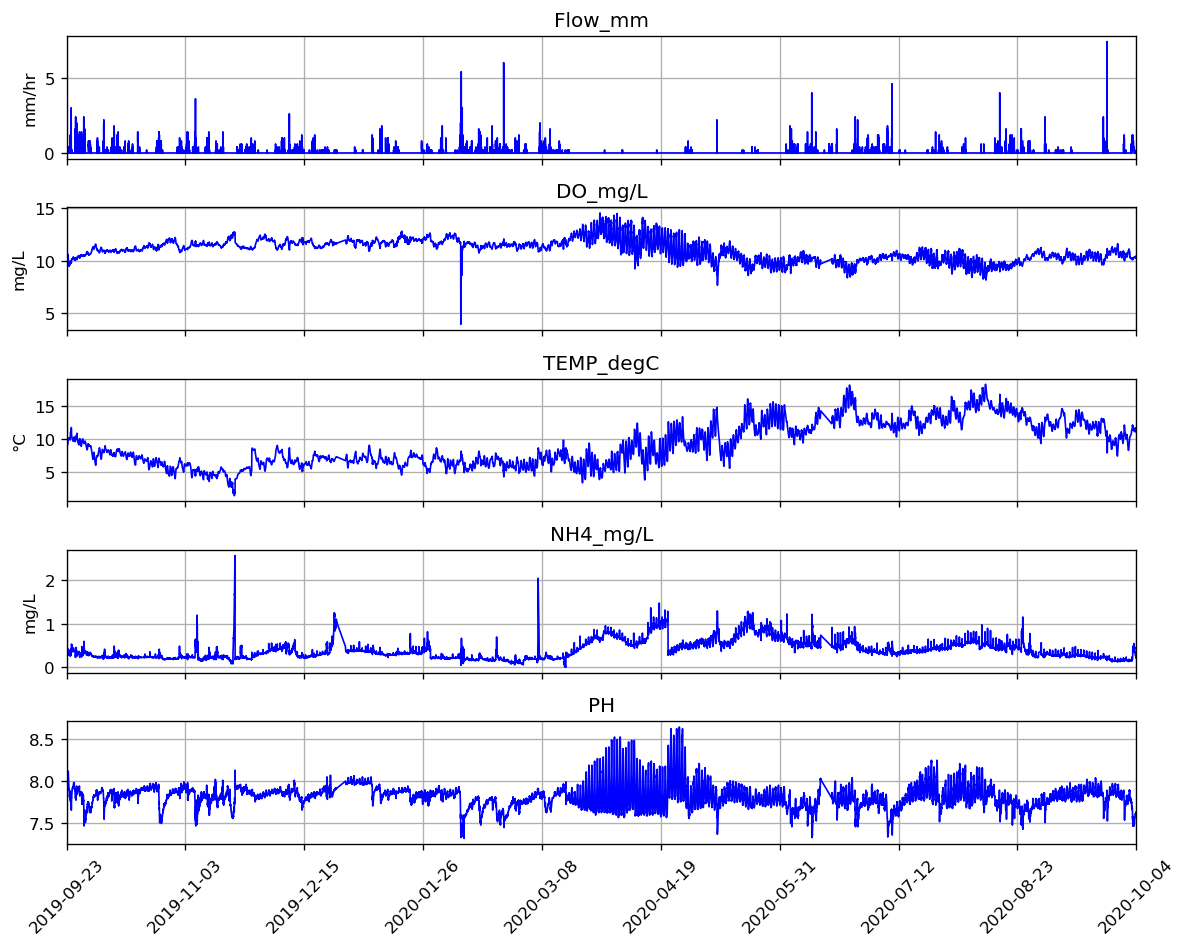

C:\Temp\ipykernel_7192\5359337.py:85: RuntimeWarning: divide by zero encountered in scalar divide
  mape = (mean_absolute_error(actual, predicted) / actual.mean()) * 100


                MSE       MAE      MAPE
Flow_mm    0.000638  0.024486       inf
DO_mg/L    0.011220  0.102961  0.985746
TEMP_degC  0.006475  0.075142  0.679526
NH4_mg/L   0.000104  0.004755  2.094861
PH         0.001431  0.037023  0.486251


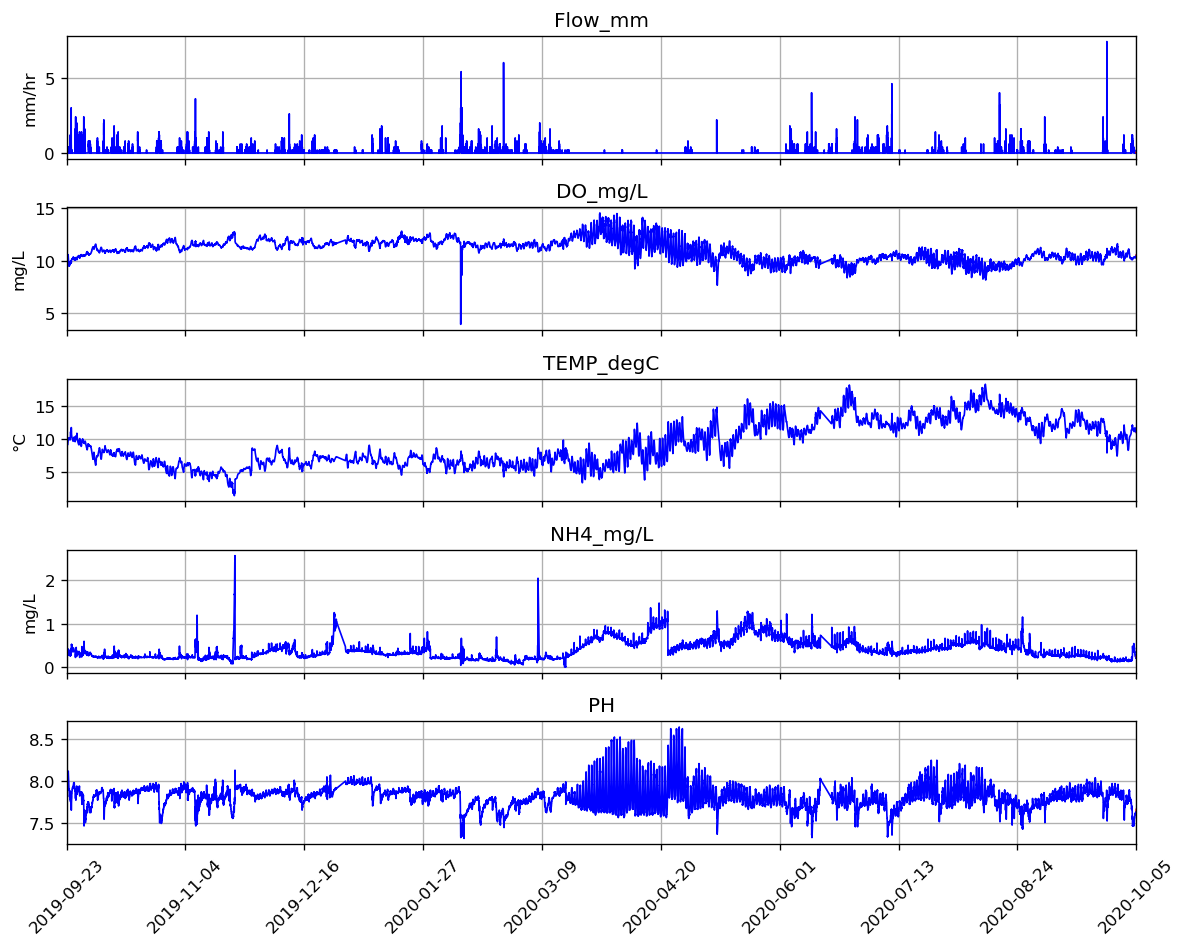

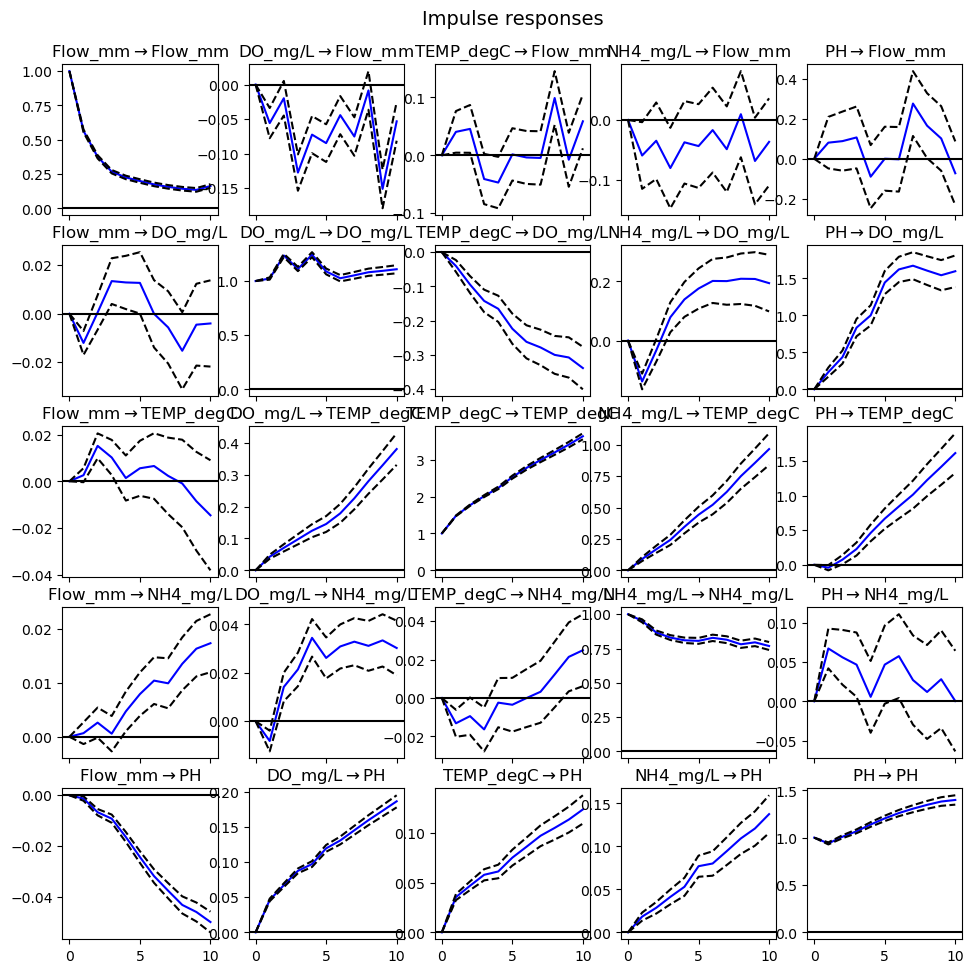

count    35565.000000
mean         9.160421
std          3.261846
min          1.520000
25%          6.480000
50%          8.130000
75%         12.030000
max         18.190000
Name: TEMP_degC, dtype: float64


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 加载数据集
file_path = r'C:\Users\潘禹承\Desktop\1941 Bradford Beck Final report\Final_Merged_Data010.csv'
data = pd.read_csv(file_path)

# 将 'datatime' 列转换为 datetime 格式
data['datatime'] = pd.to_datetime(data['datatime'], format='%Y/%m/%d %H:%M')

# 将 'datatime' 设为索引
data.set_index('datatime', inplace=True)

# 填补缺失值
data_interpolated = data.interpolate(method='linear')

# 选择相关列进行分析
selected_columns = ['Flow_mm', 'DO_mg/L', 'TEMP_degC', 'NH4_mg/L', 'PH']
data_selected = data_interpolated[selected_columns]

# 计算相关系数
correlation_matrix = data_selected.corr(method='pearson')  # 使用Pearson方法
print("Pearson Correlation Matrix:\n", correlation_matrix)

correlation_matrix_spearman = data_selected.corr(method='spearman')  # 使用Spearman方法
print("Spearman Correlation Matrix:\n", correlation_matrix_spearman)

# ADF 检验并在必要时进行差分处理
def adf_test(series, title=''):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'ADF Test for {title}: p-value = {result[1]}')
    return result[1]

# 存储差分处理后的数据
diff_data = pd.DataFrame()
for column in data_selected.columns:
    p_value = adf_test(data_selected[column], title=column)
    if p_value > 0.05:
        if column != 'TEMP_degC':  # 对温度列避免差分处理
            diff_data[column] = data_selected[column].diff().dropna()
        else:
            diff_data[column] = data_selected[column]  # 保持温度数据不变
    else:
        diff_data[column] = data_selected[column]

# 拟合 VAR 模型
model = VAR(diff_data.dropna())
results = model.fit(maxlags=15, ic='aic')

# 打印模型结果摘要
print(results.summary())

# 绘制 VAR 模型的拟合结果
fig, axes = plt.subplots(nrows=len(diff_data.columns), ncols=1, figsize=(10, 8), dpi=120, sharex=True)
units = ['mm/hr', 'mg/L', '°C', 'mg/L', '']
for i, (col, ax, unit) in enumerate(zip(diff_data.columns, axes.flatten(), units)):
    ax.plot(diff_data.index, diff_data[col], color='blue', linewidth=1)  # 确保使用plot方法
    ax.set_title(col)
    ax.set_ylabel(unit)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.grid(True)
    ax.set_xlim([diff_data.index.min(), diff_data.index.max()])
    ax.set_xticks(pd.date_range(start=diff_data.index.min(), end=diff_data.index.max(), periods=10))
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()


# 预测未来值
forecast_input = diff_data.values[-results.k_ar:]
fc = results.forecast(y=forecast_input, steps=10)
df_forecast = pd.DataFrame(fc, index=pd.date_range(start=diff_data.index[-1], periods=10, freq='15T'), columns=diff_data.columns)

# 计算并展示预测误差度量指标
metrics = {}
for column in diff_data.columns:
    actual = diff_data[column].iloc[-10:].values  # 最后 10 个真实值
    predicted = df_forecast[column].values  # 预测值
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    mape = (mean_absolute_error(actual, predicted) / actual.mean()) * 100
    metrics[column] = {'MSE': mse, 'MAE': mae, 'MAPE': mape}

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

# 绘制预测结果
fig, axes = plt.subplots(nrows=len(diff_data.columns), ncols=1, figsize=(10, 8), dpi=120, sharex=True)
for i, (col, ax, unit) in enumerate(zip(diff_data.columns, axes.flatten(), units)):
    ax.plot(diff_data.index, diff_data[col], color='blue', linewidth=1)
    ax.plot(df_forecast.index, df_forecast[col], color='red', linestyle='dashed', linewidth=1)
    ax.set_title(col)
    ax.set_ylabel(unit)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.grid(True)
    ax.set_xlim([diff_data.index.min(), df_forecast.index.max()])
    ax.set_xticks(pd.date_range(start=diff_data.index.min(), end=df_forecast.index.max(), periods=10))
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

# 计算并绘制脉冲响应函数（IRF）
irf = results.irf(10)  # 计算 10 期的 IRF
irf.plot(orth=False)
plt.show()

# 检查温度数据的统计信息
print(data['TEMP_degC'].describe())


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 加载数据集
file_path = r'C:\Users\潘禹承\Desktop\1941 Bradford Beck Final report\Final_Merged_Data010.csv'
data = pd.read_csv(file_path)

# 检查数据集的列名
print(data.columns)


Index(['DateTime', 'MP1_WQ_DO', 'MP1_WQ_NH4', 'MP1_WQ_PH', 'MP1_WQ_TEMP',
       'Depth_mm', 'Velocity_m/s', 'Flow_l/s', 'Flow_mm', 'Flow_mm/hr'],
      dtype='object')


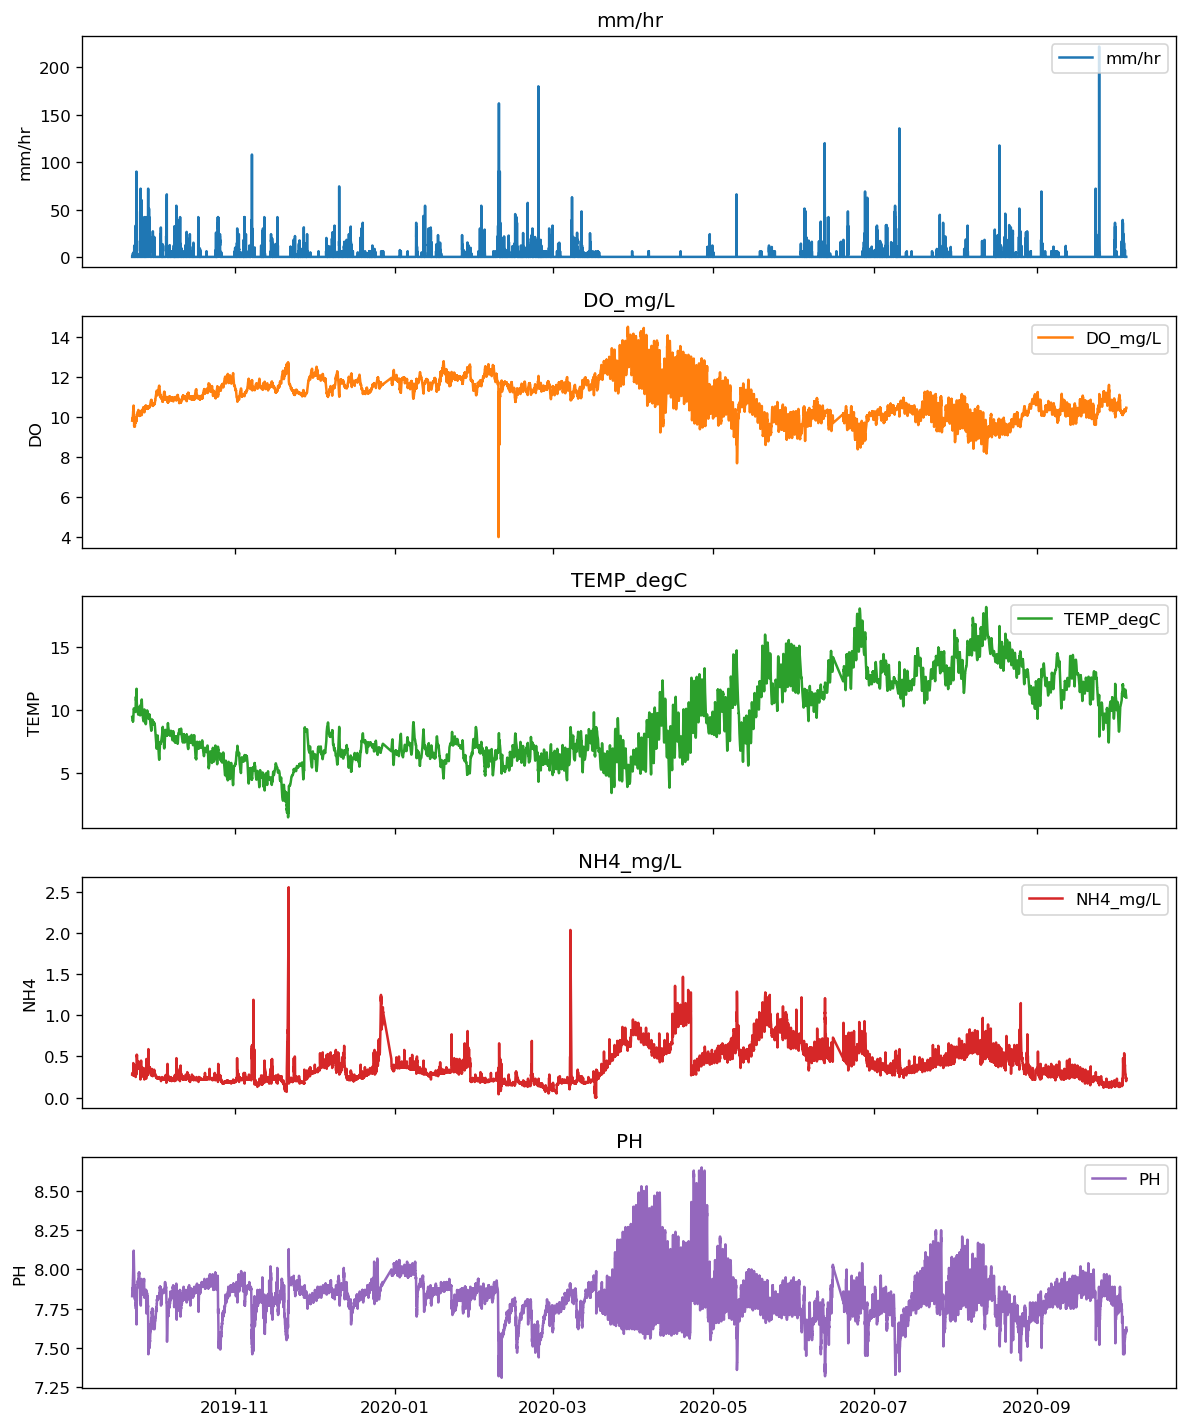

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据集
file_path = r'C:\Users\潘禹承\Desktop\1941 Bradford Beck Final report\Final_Merged_Data010.csv'
data = pd.read_csv(file_path)

# 将 'datatime' 列转换为 datetime 格式
data['datatime'] = pd.to_datetime(data['datatime'], format='%Y/%m/%d %H:%M')

# 将 'datatime' 设为索引
data.set_index('datatime', inplace=True)

# 填补缺失值
data_interpolated = data.interpolate(method='linear')

# 选择相关列进行分析
selected_columns = ['mm/hr', 'DO_mg/L', 'TEMP_degC', 'NH4_mg/L', 'PH']
data_selected = data_interpolated[selected_columns]

# 绘制所有指标在一张图中，每个指标一个子图
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(10, 12), dpi=120, sharex=True)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i, (col, color) in enumerate(zip(selected_columns, colors)):
    ax = axes[i]
    ax.plot(data_selected.index, data_selected[col], color=color, label=col)
    ax.set_title(col)
    ax.set_ylabel(col.split('_')[0])
    ax.legend(loc='upper right')

fig.tight_layout()
plt.show()
